# This is a workflow to display as many as SMILES chemical string to 10,000 images

This script reads a list of SMILES (Simplified Molecular Input Line Entry System) strings from a file, converts them into chemical structures using RDKit, and displays the structures as images directly within a Jupyter notebook. Each structure is labeled with its entry number.

## Instal conda in Colab

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...


# Please give a short time for the kenerl to restart, before you move on to the next cell

In [1]:
! conda install -c rdkit rdkit -y &> /dev/null
!conda install -q -y -c openbabel openbabel -y &> /dev/null

# Read smiles file

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('11.csv')
df

Molecule ChEMBL ID Molecule Name  Molecule Max Phase  Molecular Weight  \
0        CHEMBL3091805           NaN                 NaN            416.82   
1        CHEMBL3091794           NaN                 NaN            296.72   
2        CHEMBL2313921           NaN                 NaN            359.81   
3        CHEMBL4088144           NaN                 NaN            399.93   
4        CHEMBL3753970           NaN                 NaN            275.31   
..                 ...           ...                 ...               ...   
739      CHEMBL5183331           NaN                 NaN            341.39   
740      CHEMBL3185434           NaN                 NaN            298.30   
741      CHEMBL5095897           NaN                 NaN            328.44   
742       CHEMBL269538       HARMINE                 1.0            212.25   
743      CHEMBL1782168           NaN                 NaN            249.27   

     #RO5 Violations  AlogP   Compound Key  \
0                1.0   5.56             45   
1                0.0   3.67             32   
2                1.0   5.39             2s   
3                0.0   4.49   8; SRI-29329   
4                0.0   3.64             4f   
..               ...    ...            ...   
739              0.0   3.49              6   
740              0.0   3.56       44; ID-8   
741              0.0   3.85  46; LDN192960   
742              0.0   3.03             14   
743              0.0   2.72       32; 9AZA   

                                                Smiles Standard Type  \
0    Clc1ccc(Nc2ncnc3c2oc2cc(-c4ccc5c(c4)OCO5)cnc23...          IC50   
1                  Nc1ncnc2c1oc1cc(-c3cccc(Cl)c3)cnc12          IC50   
2            COc1ccc2c(c1)sc1c(Nc3ccc(F)c(Cl)c3)ncnc12          IC50   
3    CC(C)n1cnc2c(Nc3cccc(Cl)c3)nc(N[C@H]3CCCC[C@@H...          IC50   
4               COc1ccc2c(/C(C#N)=C/c3cccnc3)c[nH]c2c1          IC50   
..                                                 ...           ...   
739             COc1ccc2sc(C(=O)NC(=O)c3ccccc3OC)cc2c1          IC50   
740     COc1ccc(-n2c(C)c([N+](=O)[O-])c3ccc(O)cc32)cc1          IC50   
741                  COc1ccc2nc3ccc(OC)cc3c(SCCCN)c2c1          IC50   
742                      COc1ccc2c(c1)[nH]c1c(C)nccc12          IC50   
743                 O=C1Cc2c([nH]c3ccncc23)-c2ccccc2N1          IC50   

    Standard Relation  ...     Target Type Document ChEMBL ID  Source ID  \
0                 '>'  ...  SINGLE PROTEIN      CHEMBL3091443          1   
1                 '='  ...  SINGLE PROTEIN      CHEMBL3091443          1   
2                 '>'  ...  SINGLE PROTEIN      CHEMBL2311417          1   
3                 '='  ...  SINGLE PROTEIN      CHEMBL4002601          1   
4                 '='  ...  SINGLE PROTEIN      CHEMBL3875174          1   
..                ...  ...             ...                ...        ...   
739               '='  ...  SINGLE PROTEIN      CHEMBL5113421          1   
740               '>'  ...  SINGLE PROTEIN      CHEMBL5247649          1   
741               '='  ...  SINGLE PROTEIN      CHEMBL5247649          1   
742               '='  ...  SINGLE PROTEIN      CHEMBL5247649          1   
743               '>'  ...  SINGLE PROTEIN      CHEMBL5226304          1   

        Source Description      Document Journal Document Year  \
0    Scientific Literature  Bioorg Med Chem Lett          2013   
1    Scientific Literature  Bioorg Med Chem Lett          2013   
2    Scientific Literature        Eur J Med Chem          2013   
3    Scientific Literature  Bioorg Med Chem Lett          2017   
4    Scientific Literature        Eur J Med Chem          2016   
..                     ...                   ...           ...   
739  Scientific Literature        Eur J Med Chem          2022   
740  Scientific Literature            J Med Chem          2023   
741  Scientific Literature            J Med Chem          2023   
742  Scientific Literature            J Med Chem          2023   
743  Scien

## Delete those rows are not smiles

In [12]:
import pandas as pd
from rdkit import Chem

def is_valid_smiles(smiles):
    """Check if a SMILES string is valid."""
    return Chem.MolFromSmiles(smiles) is not None

# Read the CSV file
input_file = '11.csv'  # Replace with your input file path
df = pd.read_csv(input_file)

# Validate SMILES strings in the 'smiles' column
df['valid'] = df['Smiles'].apply(is_valid_smiles)

# Filter out rows with invalid SMILES
valid_df = df[df['valid']].drop(columns=['valid'])

# Export the cleaned data to a new file
output_file = 'valid_smiles.csv'  # Replace with your output file path
valid_df.to_csv(output_file, index=False)


In [13]:
df = pd.read_csv('/content/valid_smiles.smi')
df

Clc1ccc(Nc2ncnc3c2oc2cc(-c4ccc5c(c4)OCO5)cnc23)cc1
0                  Nc1ncnc2c1oc1cc(-c3cccc(Cl)c3)cnc12
1            COc1ccc2c(c1)sc1c(Nc3ccc(F)c(Cl)c3)ncnc12
2    CC(C)n1cnc2c(Nc3cccc(Cl)c3)nc(N[C@H]3CCCC[C@@H...
3               COc1ccc2c(/C(C#N)=C/c3cccnc3)c[nH]c2c1
4                 COc1ccc2c(c1)[nH]c1c3ccncc3cc(CN)c21
..                                                 ...
700             COc1ccc2sc(C(=O)NC(=O)c3ccccc3OC)cc2c1
701     COc1ccc(-n2c(C)c([N+](=O)[O-])c3ccc(O)cc32)cc1
702                  COc1ccc2nc3ccc(OC)cc3c(SCCCN)c2c1
703                      COc1ccc2c(c1)[nH]c1c(C)nccc12
704                 O=C1Cc2c([nH]c3ccncc23)-c2ccccc2N1

[705 rows x 1 columns]

# Grab out SMILES and display with Rdkit

```
$2 means the 3rd coloumn, which is the smiles column, please adjust this accordingly. For example, if your smiles is on 4th column, you need $3
```


In [16]:
!awk -F "\"*,\"*" '{print $1}' valid_smiles.smi > smile.smi

## The smile.smi was downloaded to local laptop, and the first line was deleted since if it is not a SMILES string. Save the new smile.smi and upload again to overwrite the old one.

But it was not always necessay, for example if your first row is already smiles, you don't need to do anything.

### Display the structures

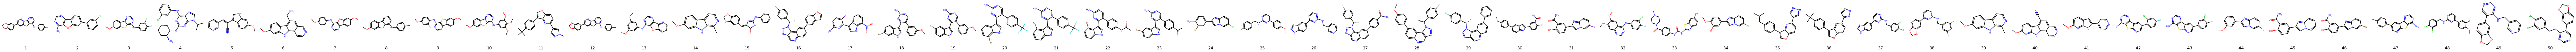

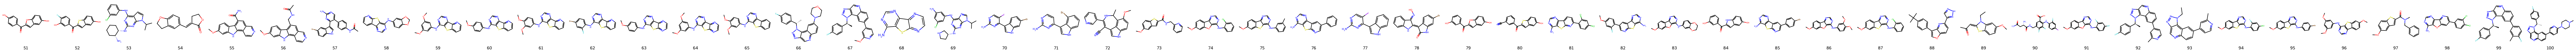

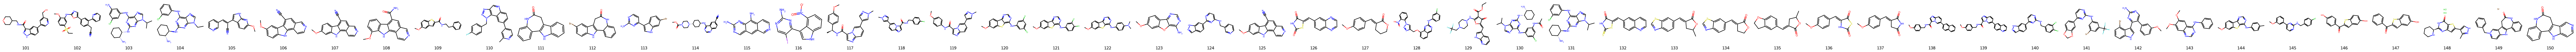

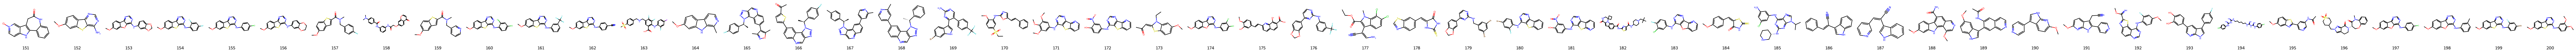

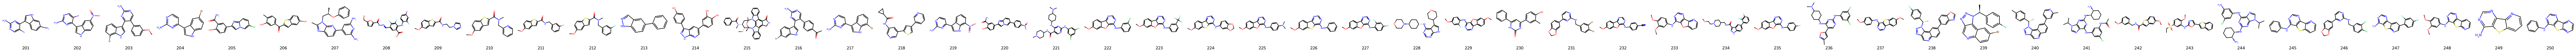

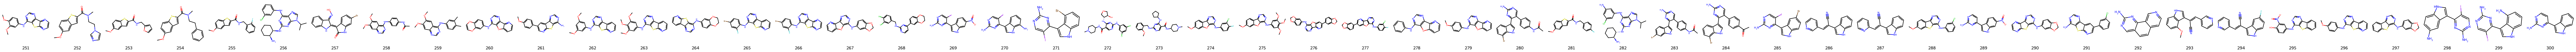

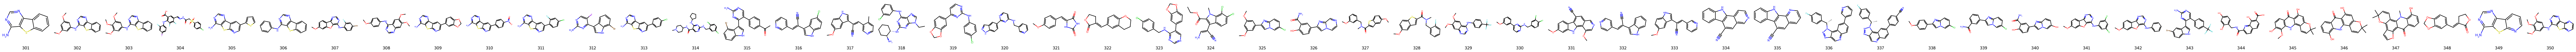

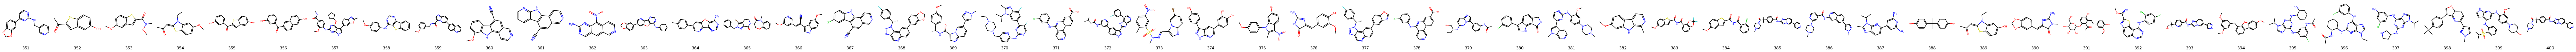

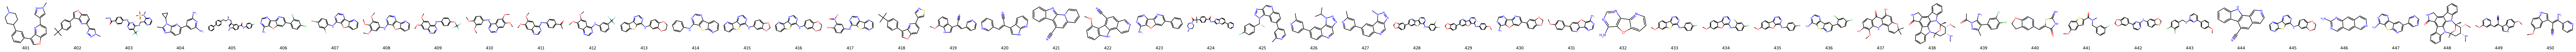

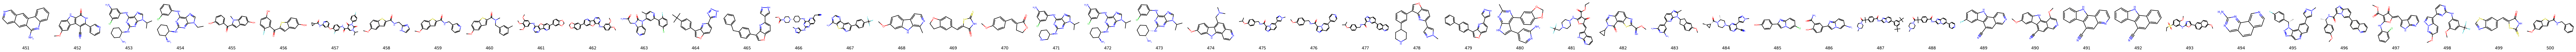

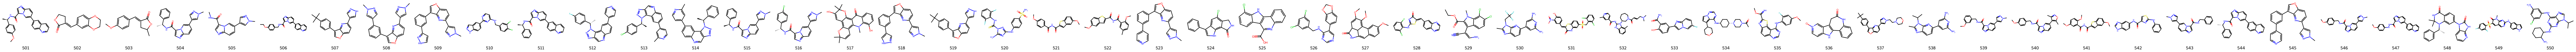

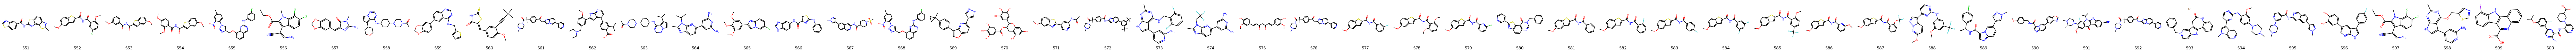

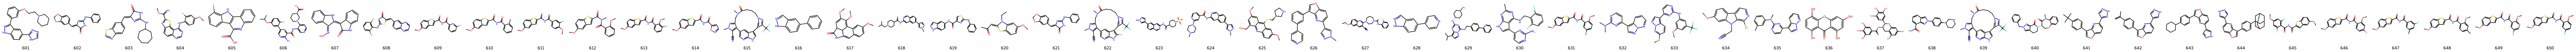

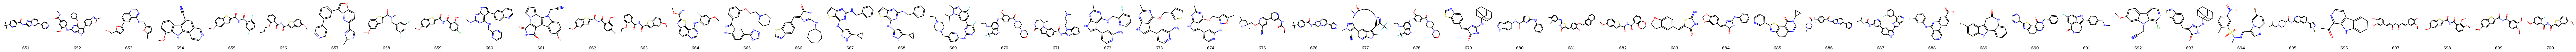

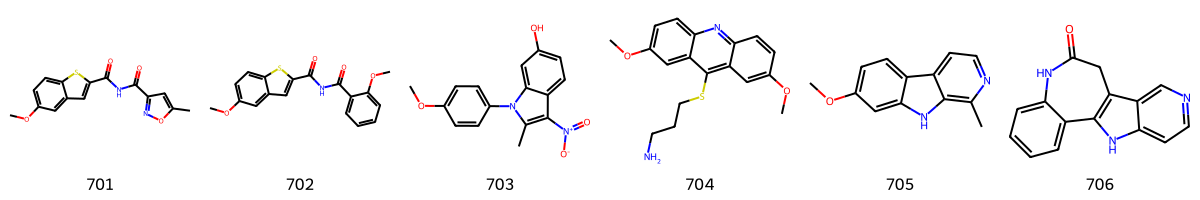

In [17]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from IPython.display import display
import math

# Function to split the list into chunks
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# Read SMILES from file
smiles_file = 'smile.smi'  # Replace with the path to your SMILES file

with open(smiles_file, 'r') as file:
    smiles_list = [line.strip() for line in file]

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list if smiles]

# Generate 2D coordinates for each molecule (important for drawing)
for mol in molecules:
    if mol:
        rdDepictor.Compute2DCoords(mol)

# Add entry numbers as legends
legends = [f'{i+1}' for i in range(len(molecules))]

# Split the molecules into chunks
molecule_chunks = list(chunks(molecules, 50))  # Adjust the chunk size as needed
legend_chunks = list(chunks(legends, 50))

# Draw and display images for each chunk
for i, (chunk, legend_chunk) in enumerate(zip(molecule_chunks, legend_chunks)):
    img = Draw.MolsToImage(chunk, subImgSize=(200, 200), legends=legend_chunk, molsPerRow=4)
    display(img)
